In [1]:
import xgboost
import pandas as pd
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # 精度值
from xgboost import XGBClassifier

In [2]:
# 印度糖尿病
pd_data = pd.read_csv('pima-indians-diabetes.csv')
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")


In [3]:
X = dataset[:, 0:8] # 第0列到第7列
Y = dataset[:, 8]   # 第8列

# X
# Y
# dataset[:, 4]

In [4]:
# 切分数据：参数的设置
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) 

In [5]:
# 建立xgboost模型
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

xgb1 = XGBClassifier(
- base_score=0.5, 
- booster='gbtree', 
- colsample_bylevel=1,
- colsample_bytree=1, 
- gamma=0, 
- learning_rate=0.1, 
- max_delta_step=0,
- max_depth=3, 
- min_child_weight=1,  # 节点最小的权重系数
- missing=None, 
- n_estimators=100,   # 多少个树
- n_jobs=1, 
- pnthread=None, 
- objective='binary:logistic', 
- random_state=0,
- reg_alpha=0, 
- reg_lambda=1, 
- scale_pos_weight=1, 
- seed=None,
- silent=True, 
- subsample=1   # 选择样本上是否随机 随机选择80%
)

In [28]:
# 对测试集进行预测
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]  # round() 返回浮点数x的四舍五入
# 比较得到精度值
accuracy = accuracy_score(y_test, predictions)
print('精度--Accuracy: %.f%%' % (accuracy * 100.0))

精度--Accuracy: 78%


In [21]:
# fir model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]

model.fit(
    X_train, 
    y_train, 
    early_stopping_rounds=10, 
    eval_metric='logloss', 
    eval_set=eval_set,
    verbose=True)
y_pred = model.predict(X_train)
prediction_s = [round(value) for value in y_pred]

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


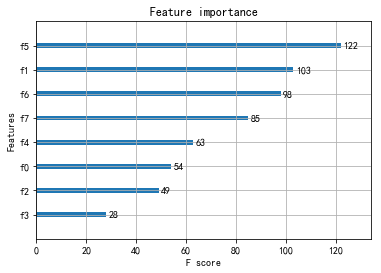

In [30]:
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost import plot_importance
model = XGBClassifier()
model.fit(X, Y)
plot_importance(model)
pyplot.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring='neg_log_loss', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -0.483304 using {'learning_rate': 0.1}


In [37]:
means = grid_result.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

-0.689811 with: {'learning_rate': 0.0001}
-0.661827 with: {'learning_rate': 0.001}
-0.531155 with: {'learning_rate': 0.01}
-0.483304 with: {'learning_rate': 0.1}
-0.515642 with: {'learning_rate': 0.2}
-0.554158 with: {'learning_rate': 0.3}
